# CLASSIFICATION D'IMAGES : Base de données MNIST
La base de données MNIST est un jeu d'images de chiffres écrits à la main souvent utilisée comme benchmark pour des algorithmes de classification. Les images sont en noir et blanc, de 28 pixels de côté.


# Importation des bibliothèques

In [2]:
import numpy as np
import pandas as pd 
import sklearn
import matplotlib.pyplot as plt

## Importation des données MNIST
### ==> executez en répondant aux questions
Les données sont disponibles dans les datasets de sklearn. On peut les recupérer avec la fonction fetch_openml (cf. ci-dessous)

In [3]:
from sklearn.datasets import fetch_openml

# Récupération des Images
mnist = fetch_openml('mnist_784', as_frame=False, parser="auto")

# QUESTION 1 : Consultez les différents attributs de mnist
mnist

{'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {'class': ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46

In [4]:
# Creation des inputs et des labels
X, y = mnist.data, mnist.target
print(X)
print(y)
print(X.shape)
print(y.shape)

# QUESTION 2 : Expliquez le contenu de X et y
# X c'est les données et y c'est le label 

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
['5' '0' '4' ... '4' '5' '6']
(70000, 784)
(70000,)


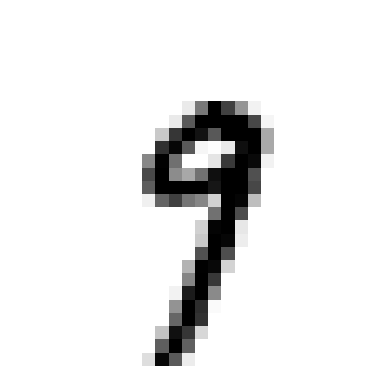

In [58]:
# Exemple d'affichage d'une image (selection pas la position de l'image dans le dataset)
numero_image = 133
image = X[numero_image].reshape(28, 28)
plt.imshow(image, cmap="binary")
plt.axis("off")
plt.show()

In [6]:
# Affichage du label associé
print(y[numero_image])

9


## Création des datasets
### ==> saisir le code

Création des datasets d'entraintement (X_train, y_train) et de test (X_test, y_test). Par exemple, les 60000 premières images serviront à l'entrainement et les autres au test.

In [41]:
# Question 3 : Créez les datasets : X_train, X_test, y_train et y_test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)


# 1. Classification binaire
Dans cette première partie, vous chercherez à classer l'image d'un chiffre choisi parmi toutes les autres. Une classe correspond donc aux images de ce chiffre. L'autre classe correspond à toutes les autres images. 

## Modification des datasets
### ==> saisir le code
On commence par la classification binaire. Vous allez choisir un label comme classe. Tous les autres labels seront associés à l'autre classe. Il sera intéressant de voir ce que donne la classification binaire selon le label choisi.

In [132]:
# Question 4 : Modifiez (ou créez) les datasets pour la classification binaire : y_train5 et y_test5
#
y_train_5 = (y_train == '2')
y_test_5 = (y_test == '2')

## Entrainement : modèle de régression logistique
### ==> executez en répondant aux questions
Scikit Learn dispose d'une fonction de classifieur linéaire très performante pour les gros datasets avec mise en oeuvre de la descente du gradient stochastique : SGDClassifier 
Elle permet d'utiliser une méthode de régression logistique entre autres. 
Les algorithmes de classification seront vus lors de la deuxième séance. 

In [133]:
from sklearn.linear_model import SGDClassifier

# Question 5 : Consultez la documentation pour expliquer les 2 commandes suivantes. 
sgd_clf = SGDClassifier(loss='log_loss',random_state=42)
sgd_clf.fit(X_train, y_train_5)


SGDClassifier(loss='log_loss', random_state=42)

In [134]:
# Question 6 : Analysez précisément ce qui est calculé ave chacun des commandes suivantes. 
print(sgd_clf.predict(X_train[numero_image].reshape(1, -1)))
print(sgd_clf.predict_proba(X_train[numero_image].reshape(1, -1)))
print(sgd_clf.decision_function(X_train[numero_image].reshape(1, -1)))


[False]
[[1. 0.]]
[-12240.7285698]


## Evalution de la performance : Taux d'erreur (accuracy)
### ==> saisir le code et répondre aux questions


In [135]:
from sklearn.metrics import accuracy_score

# Question 6 : En utilisant accuracy_score, évaluez le taux d'erreur sur le dataset d'entainement et le dataset de test
# Concluez. 
# 

entr = sgd_clf.predict(X_train)
print('train:' , accuracy_score(y_train_5, entr))
pred = sgd_clf.predict(X_test)
print('test:' ,accuracy_score(y_test_5, pred))



train: 0.9781680672268908
test: 0.9761904761904762


## Evalution de la performance : Matrice de Confusion
### ==> saisir le code et répondre aux questions

In [136]:
from sklearn.metrics import confusion_matrix
# Remarque: lignes : vraies valeurs / colonnes : prédictions

# Question 7 : En utilisant confusion_matrix, calculez puis affichez la matrice de confusion
#

VN, FP, FN, VP = confusion_matrix(y_test_5, pred).ravel()

print('VP  = ', VP)
print('FP = ', FP)
print('VN  = ', VN)
print('FN = ', FN)


VP  =  882
FP =  64
VN  =  9368
FN =  186


## Evalution de la performance : Precision et Rappel
### ==> saisir le code et répondre aux questions

In [137]:
from sklearn.metrics import precision_score, recall_score

# Question 8 : En utilisant  precision_score et recall_score, calculez puis affichez la précision et le rappel
#
print("precision score: " , precision_score(y_test_5, pred, average="binary"))
print("recall score: " , recall_score(y_test_5, pred, average="binary"))

print("precision: ", VP/(FP+VP))
print("rappel: ", VP/(FN+VP))


# Vous pouvez vérifier éventuellement les résultats ainsi : 
# precision: TP / (FP + TP) : matrice_confusion[1, 1] / (matrice_confusion[0, 1] + matrice_confusion[1, 1])
# rappel: TP / (FN + TP) : matrice_confusion[1, 1] / (matrice_confusion[1, 0] + matrice_confusion[1, 1])

precision score:  0.9323467230443975
recall score:  0.8258426966292135
precision:  0.9323467230443975
rappel:  0.8258426966292135


## Compromis Precision/Rappel
### ==> saisir le code et répondre aux questions

In [138]:
# Par défaut, la régression logistique avec SGDClassifier considère que si le score est négatif (respectivement positif)
# l'individu appartient à la classe "false" (respectivement "true").
# Le seuil est donc zéro. 

# Question 9 : A partir des scores calculés pour les images du dataset de test, 
# calculez les prédictions avec un seuil de 0 et retrouvez ainsi le nombre de prédictions correctes.

print(accuracy_score(y_test_5, pred))

# Question 10 : Ensuite modifiez (à la main) le seuil pour évaluer son impact sur le nombre de prédictions correctes  
#
y_scores = sgd_clf.predict_proba(X_test)
predictions = (y_scores[:, 1] > 0.5).astype(int)
accuracy_score(y_test_5, predictions)



0.9761904761904762


0.9761904761904762

## Courbe PRECISION-RAPPEL
### ==> executer le code et analyser la figure

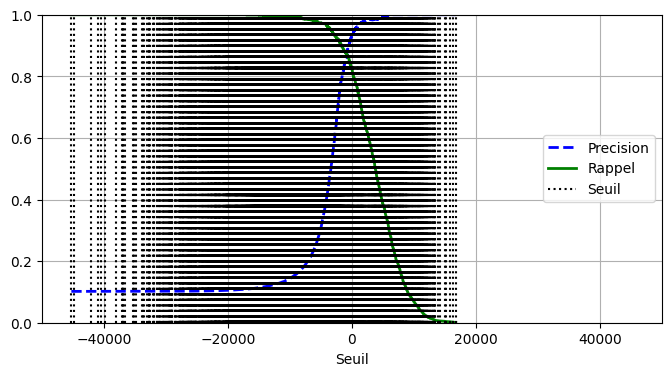

In [139]:
# La fonction precision_recall_curve calcule la precision et le rappel pour différents seuils
# Il est alors possible de tracer l'évolution des la précision et du rappel en fonction du seuil

from sklearn.metrics import precision_recall_curve
y_scores = sgd_clf.decision_function(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test_5, y_scores)
plt.figure(figsize=(8, 4))  
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Rappel", linewidth=2)
plt.vlines(thresholds, 0, 1.0, "k", "dotted", label="Seuil")

plt.axis([-50000, 50000, 0, 1])
plt.grid()
plt.xlabel("Seuil")
plt.legend(loc="center right")
plt.show()

## Courbe ROC et calcul AUC
### ==> executer le code et analyser la figure


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


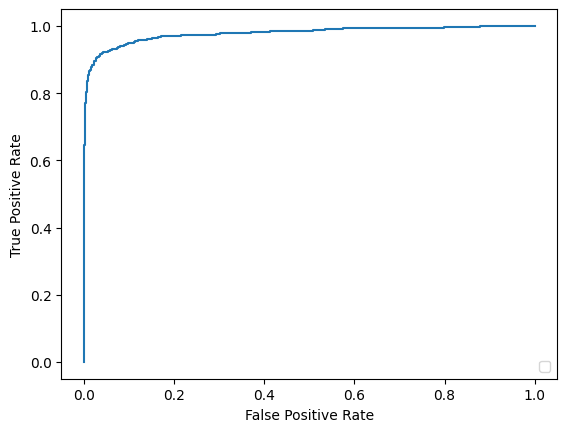

In [140]:
from sklearn.metrics import roc_curve, RocCurveDisplay

fpr, tpr, thresholds = roc_curve(y_test_5, y_scores)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [141]:
# Calcul AUC
from sklearn.metrics import roc_auc_score

AUC = roc_auc_score(y_test_5, y_scores)
print(AUC)

0.9775628349423273


### Recommencer 3 fois en changeant le label. Concluez si les performances du classifieur dépendent du label à retrouver.

# 2. Classification Multi-classes
Dans cette seconde partie, on cherche à classer chaque chiffre dans une classe spécifique.

In [143]:
# Question 11 : entrainez un classifieur multi-classes avec le même algorithme 
# Question 12 : calculez le taux d'erreur global et affichez la matrice de confusion
# Question 13 : analysez la matrice de confusion

sgd_clf_multi = SGDClassifier(loss='log_loss',random_state=42)
sgd_clf_multi.fit(X_train, y_train)

SGDClassifier(loss='log_loss', random_state=42)

In [154]:
pred_multi = sgd_clf_multi.predict(X_test)
print('test:' ,accuracy_score(y_test, pred_multi))

print(confusion_matrix(y_test, pred_multi))

test: 0.8687619047619047
[[ 993    0    6    5    5    0    1    0    5    1]
 [   1 1104   23    2    2    5    1    5    6    2]
 [  11   10  982   12   11    3    7   18   11    3]
 [   6    5   69  909   15   21    1   20   17   12]
 [   4    4   12    1  974    3    5    6    1   17]
 [  24    4   25   42   68  618   23   14   75   19]
 [  16    4   45    0   13    4  959    3   20    1]
 [   2    5   23    6   18    2    2  994    4   33]
 [  15   17  139   23   62   10    1    6  769   15]
 [  10    5    6   14  109    1    0   68    7  820]]


### Comparer les performances de la classification binaire et de la classification multi-classes.